Saving Retail and wherehouse Sale.csv to Retail and wherehouse Sale (5).csv
📌 Missing Values Before Fixing:
year                 0
month                0
supplier            33
item_code            0
item_description     0
item_type            0
retail_sales         1
retail_transfers     0
warehouse_sales      0
dtype: int64

✅ Missing Values After Fixing:
year                0
month               0
supplier            0
item_code           0
item_description    0
item_type           0
retail_sales        0
retail_transfers    0
warehouse_sales     0
dtype: int64

📊 Descriptive Statistics:
       retail_sales  retail_transfers  warehouse_sales
count  29999.000000      29999.000000     29999.000000
mean       6.939796          6.594278        27.431945
std       33.081054         27.879867       272.170575
min       -0.420000         -6.000000     -3999.000000
25%        0.000000          0.000000         0.000000
50%        0.160000          0.000000         1.000000
75%        2.9200

/tmp/ipython-input-3246890191.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['supplier'].fillna('Unknown Supplier', inplace=True)
/tmp/ipython-input-3246890191.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['retail_sales'].resample('M').sum().plot(figsize=(12,5), marker='o', title='Monthly Retail Sales Trend')


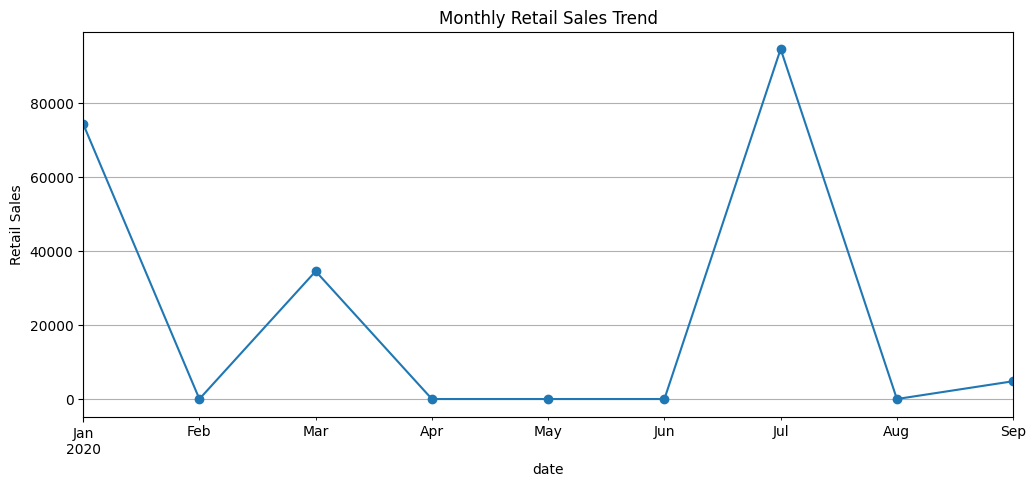

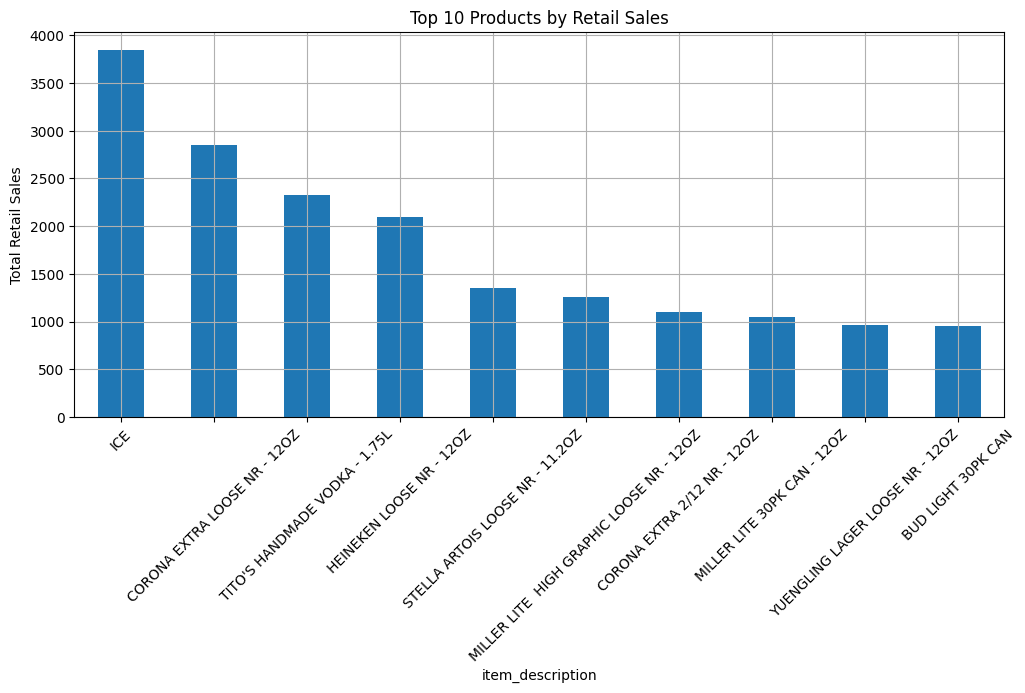

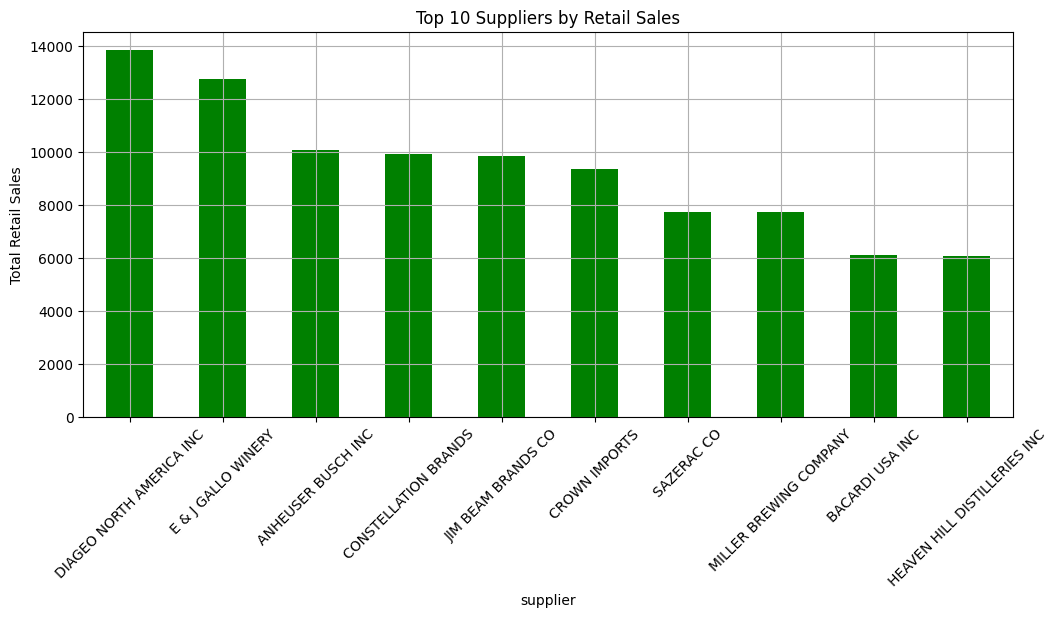

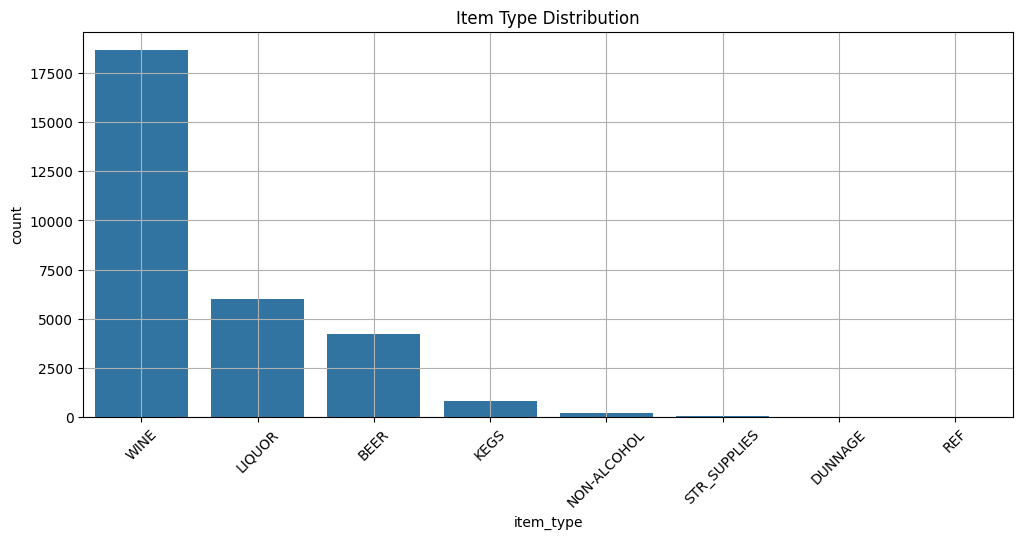

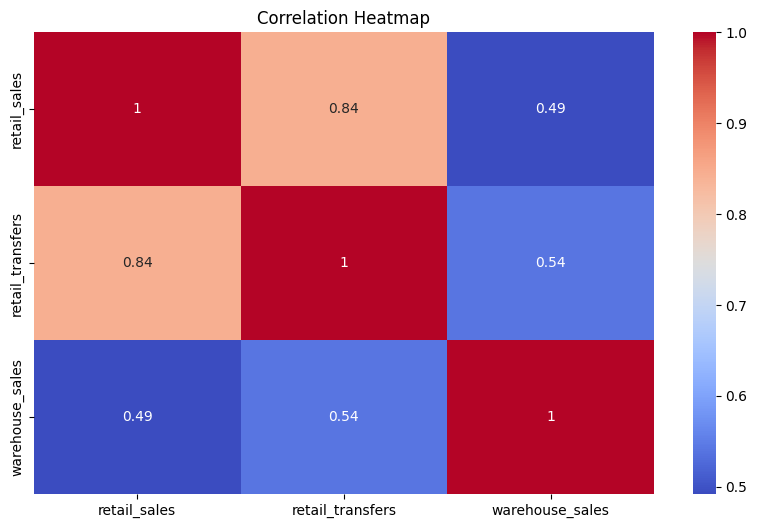


✅ EDA complete. You can now write insights and recommendations.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()

a
import io
df = pd.read_csv(io.BytesIO(next(iter(uploaded.values()))))


df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


print("📌 Missing Values Before Fixing:")
print(df.isnull().sum())


df = df.dropna(subset=['retail_sales'])


df['supplier'].fillna('Unknown Supplier', inplace=True)


df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-01')
df.set_index('date', inplace=True)


print("\n✅ Missing Values After Fixing:")
print(df.isnull().sum())


print("\n📊 Descriptive Statistics:")
print(df[['retail_sales', 'retail_transfers', 'warehouse_sales']].describe())


df['retail_sales'].resample('M').sum().plot(figsize=(12,5), marker='o', title='Monthly Retail Sales Trend')
plt.ylabel("Retail Sales")
plt.grid(True)
plt.show()

top_products = df.groupby('item_description')['retail_sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,5))
top_products.plot(kind='bar')
plt.title("Top 10 Products by Retail Sales")
plt.ylabel("Total Retail Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

top_suppliers = df.groupby('supplier')['retail_sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,5))
top_suppliers.plot(kind='bar', color='green')
plt.title("Top 10 Suppliers by Retail Sales")
plt.ylabel("Total Retail Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(12,5))
sns.countplot(data=df, x='item_type', order=df['item_type'].value_counts().index)
plt.title("Item Type Distribution")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df[['retail_sales', 'retail_transfers', 'warehouse_sales']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

print("\n✅ EDA complete. You can now write insights and recommendations.")
